<a href="https://colab.research.google.com/github/Yaman-Shadid/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales


- Author: Yaman M Shadid

## Project Overview

## Load and Inspect Data

**Data** **Dictionary**

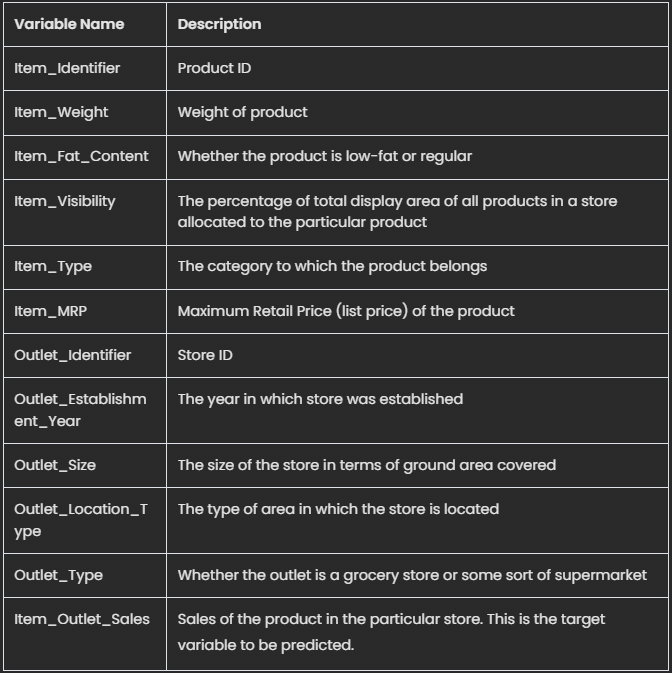

####**Imports**

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Import required packages
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns

# Save the filepath and load the data as "df_titanic"
fpath = "/content/drive/MyDrive/Coding-Dojo/Project/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

**Data Cleaning**

In [6]:
df.shape

(8523, 12)

######**There are `8523` rows and `12` columns**

**DataTypes**

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Duplicates**

In [7]:
# Checking for duplicates
duplicates = df.duplicated()

In [8]:
# Counting the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


In [9]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Verifying if duplicates are dropped
print("Duplicates dropped:", df.duplicated().sum())

### Missing Values
Checking for missing values:

In [11]:
# Checking for missing values
missing_values = df.isnull().sum()

In [12]:
# Displaying the count of missing values for each column
print(missing_values)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


Identifying % of missing data

In [13]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Missing Values:
  - There are `1463` missing values in the `Item Weight` column. (17.17%)
  - There are `2410` missing values in the `Outlet Size` column. (28.28%)

Fixing `Outlet_Size`

- Filling in the `Outlet_Size` column with the word `Unknown`.

In [24]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')

In [25]:
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

- Checking to make sure the values for the `Outlet_Size` column were filled in.

In [26]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Fixing `Item_Weight`

In [30]:
# Filling missing values with a placeholder
df_filled = df.fillna('-1')

# Displaying the DataFrame with filled values
print(df_filled)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

- Checking to make sure the values for the `salary_in_usd` column were filled in.

In [31]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [32]:
# Checking for missing values after filling
missing_values_after_fill = df_filled.isnull().sum()

# Displaying the count of missing values for each column
print(missing_values_after_fill)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Categorical Columns

In [33]:
# Identify columns with categorical data
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [34]:
# Check unique values in categorical columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in Item_Identifier:
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Unique values in Item_Fat_Content:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Unique values in Item_Type:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Unique values in Outlet_Identifier:
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Unique values in Outlet_Size:
['Medium' 'Unknown' 'High' 'Small']

Unique values in Outlet_Location_Type:
['Tier 1' 'Tier 3' 'Tier 2']

Unique values in Outlet_Type:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



- Fixing inconsistent categories
- Found that `Item_Fat_Content` needs fixing

In [42]:
# Standardize the values in the column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':"Low Fat", 'LF':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Numerical Columns**

In [35]:
# Selecting numerical columns
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Calculate and display summary statistics
for column in numerical_columns:
    column_data = df[column]
    column_min = column_data.min()
    column_max = column_data.max()
    column_mean = column_data.mean()
    print(f"Summary statistics for {column}:")
    print(f"Minimum: {column_min}")
    print(f"Maximum: {column_max}")
    print(f"Mean: {column_mean}")
    print()

Summary statistics for Item_Weight:
Minimum: 4.555
Maximum: 21.35
Mean: 12.81341957057374

Summary statistics for Item_Visibility:
Minimum: 0.0
Maximum: 0.328390948
Mean: 0.06613202877895108

Summary statistics for Item_MRP:
Minimum: 31.29
Maximum: 266.8884
Mean: 140.9927819781767

Summary statistics for Outlet_Establishment_Year:
Minimum: 1985
Maximum: 2009
Mean: 1997.8318667135984

Summary statistics for Item_Outlet_Sales:
Minimum: 33.29
Maximum: 13086.9648
Mean: 2181.288913575032



Summary

In [43]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

## Feature Inspection